# Mengimpor Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca Gambar

In [3]:
image = cv2.imread('KUCING.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(-0.5, 499.5, 666.5, -0.5)

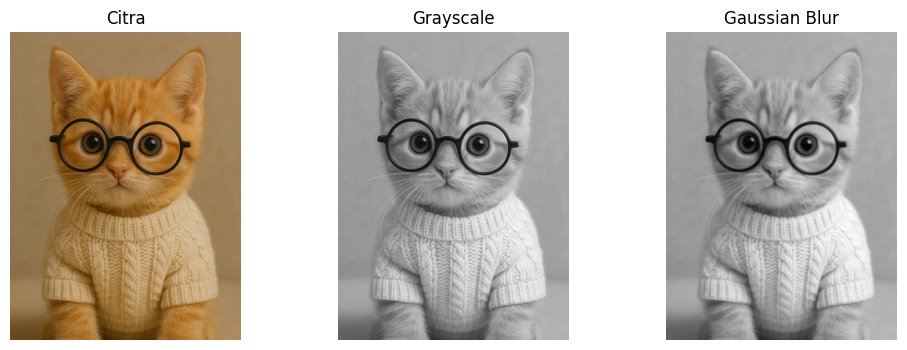

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Citra")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
    
plt.subplot(1,3,3)
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

# Threshold

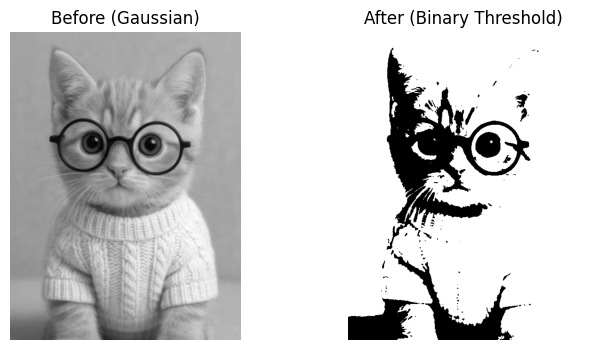

In [8]:
ret, threshold_image = cv2.threshold(
    blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(blurred_image, cmap='gray')
plt.title("Before (Gaussian)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(threshold_image, cmap='gray')
plt.title("After (Binary Threshold)")
plt.axis('off')
plt.show()

# Morfologi

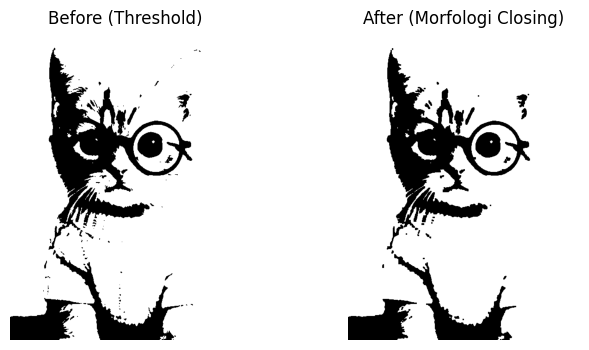

In [11]:
kernel = np.ones((3,3), np.uint8)
closing_image = cv2.morphologyEx(threshold_image, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(threshold_image, cmap='gray')
plt.title("Before (Threshold)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(closing_image, cmap='gray')
plt.title("After (Morfologi Closing)")
plt.axis('off')
plt.show()

# Contour Detection

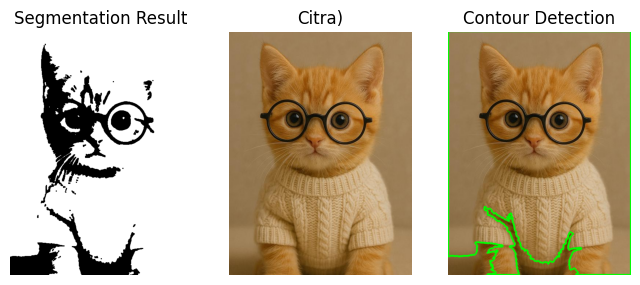

In [13]:
contours, hierarchy = cv2.findContours(
    closing_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_contour = image_rgb.copy()

for contour in contours:
    area = cv2.contourArea(contour)
    if area > 3000:
        cv2.drawContours(image_contour, [contour], -1, (0, 255, 0), 3)

plt.figure(figsize=(8,4))
plt.subplot(1,3,1)
plt.imshow(closing_image, cmap='gray')
plt.title("Segmentation Result")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(image_rgb)
plt.title("Citra)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_contour)
plt.title("Contour Detection")
plt.axis('off')
plt.show()